# 1. Data Description

#### For players.csv dataset  
-Number of observations: 196  
-Number of variables: 7  
-Summary statistics:  
The played_hours has min value 0.00, max value 223.10 and mean value 5.85. The Age has min value 9.00, max value 58.00 and mean value 21.14. Experience has 5 different levels (Beginner/Amateur/Regular/Veteran/Pro). Gender has 7 types (Male/Female/Non-binary/Prefer not to say/Agender/Two-Spirited/Other).  
-Name and type of variables:  
experience, subscribe, gender, hashedEmail, name are qualitative variables. played_hours, Age are quantitative variables.  
-Issues seen in the data:  
It has NA in Age, which means some Age data is unknown. hashedEmail and name are not analytically meaningful.  
-Other potential issues:  
Age, gender, experience are self-reported, which may cause survey response bias.  
-How the data were collected:  
When players enter Minecraft server, the basic information is recorded and collected by the research project system.  

#### For sessions.csv dataset  
-Number of observations: 1535  
-Number of variables: 5  
-Summary statistics:  
We can calculate the duration using duration = end_time - start_time.  
-Name and type of variables:  
hashedEmail, start_time, end_time are qualitative variables. original_start_time, original_end_time are quantitative variables.  
-Issues seen in the data:  
Some session records are incomplete, missing start or end times. hashedEmail is not analytically meaningful.  
-Other potential issues:  
The idle time cannot be distinguished.  
-How the data were collected:  
The Minecraft server automatically logs each player’s login and logout time.

# 2. Questions

#### Broad question: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?  

#### Specific question: 
To what extent do game engagement (measured by played_hours), age and gender predict newsletter subscription behaviour, and do these effects vary across different player experience levels?  

#### Description:  
I will use players.csv dataset and create bar charts and scatter plots. For the bar chart, I will select gender as my explanatory variable and subscribe as my response variable. Then use it to find the proportion of subscription for different genders across various player types, and find which gender tends to have more subscription. For the scatter plot, I will select played_hours and Age as my explanatory variables, and subscribe as my response variable. Then I will ignore the unknown values and convert Age into numeric variable. After that, I will plot a scatter plot with played_hours on x-axis and Age on y-axis and use two different colour for subscription behaviour to compare the charateristics of subscription behaviour across various player types.

# 3. Exploratory Data Analysis and Visualization

In [15]:
library(repr)
library(tidyverse)
library(readxl)
source("cleanup.R")
options(repr.matrix.max.rows = 6)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [16]:
players<-read_excel("data/players.xlsx")
sessions<-read_excel("data/sessions.xlsx")
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-04-15 07:12:00,2024-04-15 07:21:00,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,2024-09-21 02:13:00,2024-09-21 02:30:00,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,2024-06-21 02:31:00,2024-06-21 02:49:00,1.71894e+12,1.71894e+12


In [17]:
players_adjusted<-players|>
select("experience","subscribe","gender","played_hours","Age")
players_adjusted

experience,subscribe,gender,played_hours,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>
Pro,TRUE,Male,30.3,9
Veteran,TRUE,Male,3.8,17
Veteran,FALSE,Male,0.0,17
Amateur,TRUE,Female,0.7,21
Regular,TRUE,Male,0.1,21
Amateur,TRUE,Female,0.0,17
Regular,TRUE,Female,0.0,19
Amateur,FALSE,Male,0.0,21
Amateur,TRUE,Male,0.1,47


In [18]:
players_mean_all<-players_adjusted|>
summarize(avg_played_hours = mean(played_hours), avg_Age = mean(as.numeric(Age),na.rm=TRUE))

players_mean<-players_adjusted|>
group_by(subscribe) |>
summarize(avg_played_hours = mean(played_hours), avg_Age = mean(as.numeric(Age),na.rm=TRUE))

players_mean_all
players_mean

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `avg_Age = mean(as.numeric(Age), na.rm = TRUE)`.
Caused by warning in `mean()`:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `avg_Age = mean(as.numeric(Age), na.rm = TRUE)`.
ℹ In group 2: `subscribe = TRUE`.
Caused by warning in `mean()`:
! NAs introduced by coercion”


avg_played_hours,avg_Age
<dbl>,<dbl>
5.845918,21.13918


subscribe,avg_played_hours,avg_Age
<lgl>,<dbl>,<dbl>
FALSE,0.5019231,23.7500
TRUE,7.7756944,20.1831


### (1) Find the proportion of subscription for different genders across various player types

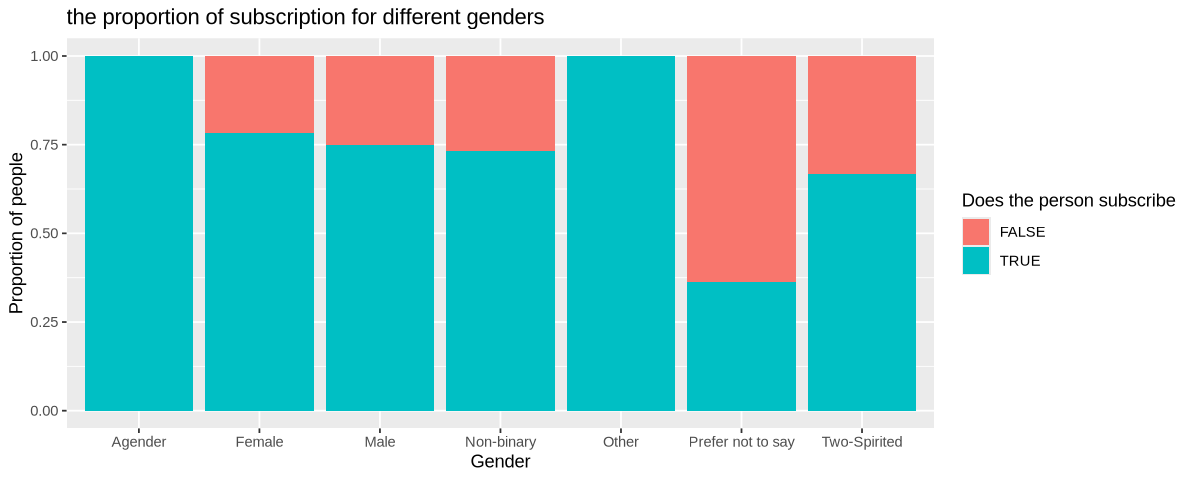

In [19]:
options(repr.plot.width = 10, repr.plot.height = 4)

bar_plot <- players_adjusted|>
ggplot(aes(x = gender, fill = subscribe)) + 
geom_bar(position = 'fill') + 
xlab("Gender") +
ylab("Proportion of people") +
labs(fill = "Does the person subscribe") +
ggtitle("the proportion of subscription for different genders")
bar_plot

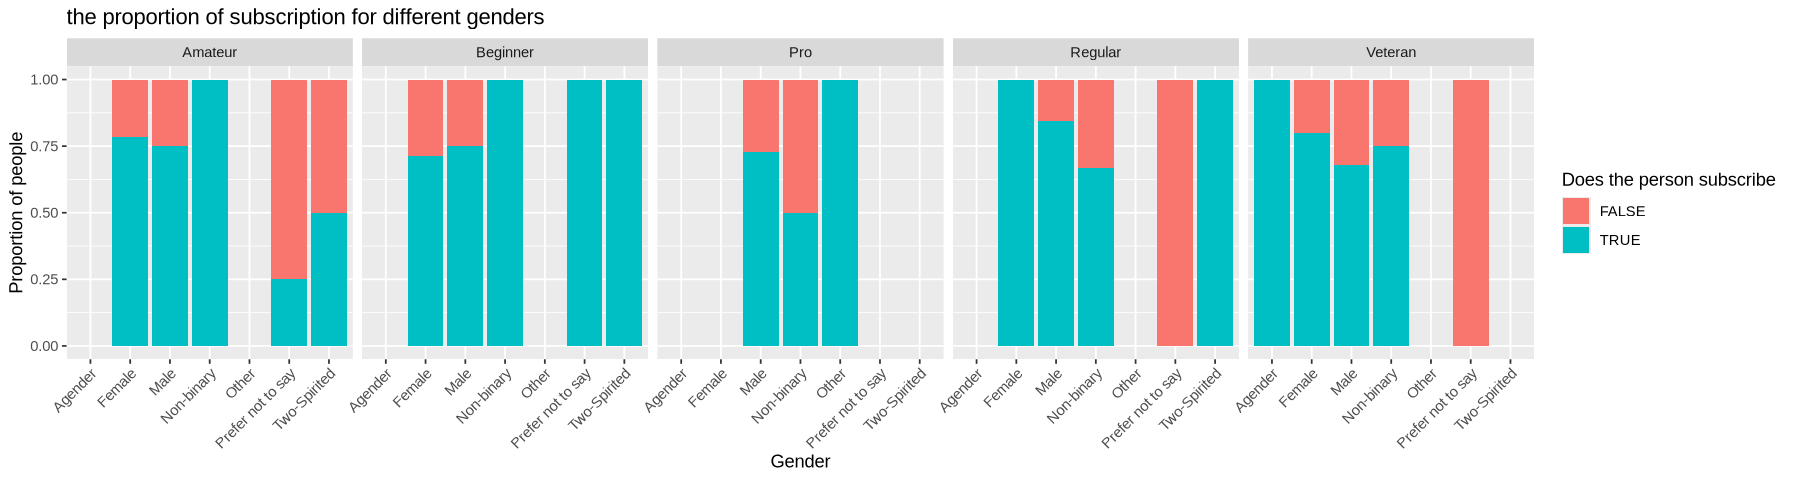

In [20]:
options(repr.plot.width = 15, repr.plot.height = 4)

bar_plots <- bar_plot+
facet_grid(~ experience)+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
bar_plots

Gender appears to have only a weak and inconsistent relationship with subscription behavior. While some gender categories show higher subscription proportions in certain groups, these patterns are not consistent and may be influenced by small sample sizes, especially among less common gender identities.

### (2)  Find the charateristics of subscription behaviour across various player types

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


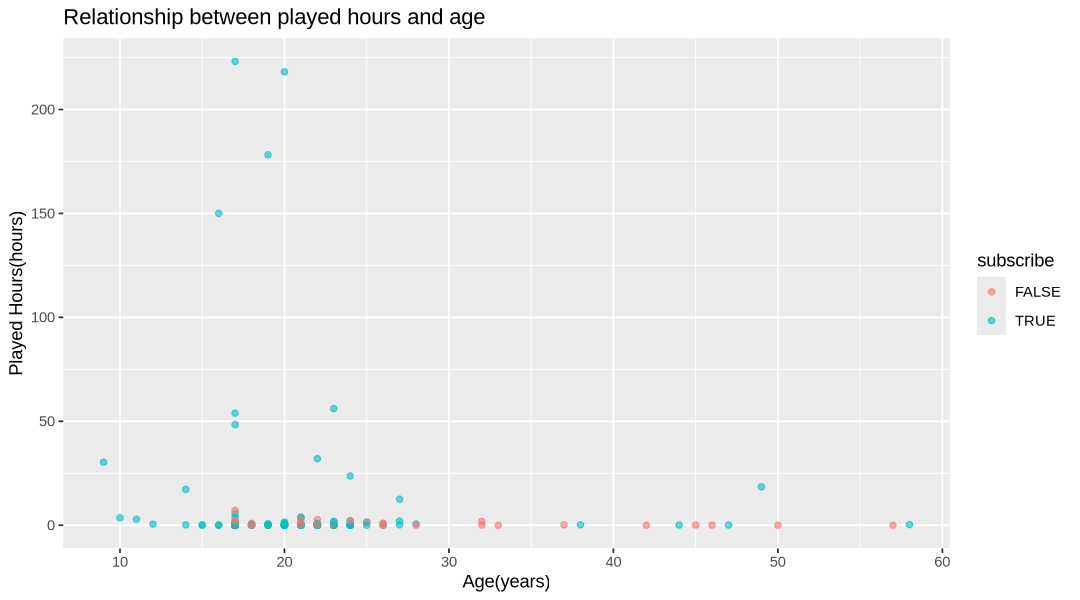

In [21]:
options(repr.plot.width = 9, repr.plot.height = 5)

scatter_plot<- players_adjusted|>
ggplot(aes(x = as.numeric(Age), y = played_hours, colour=subscribe)) + 
geom_point(alpha = 0.6, na.rm=TRUE) + 
xlab("Age(years)") +
ylab("Played Hours(hours)") +
ggtitle("Relationship between played hours and age")
scatter_plot

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


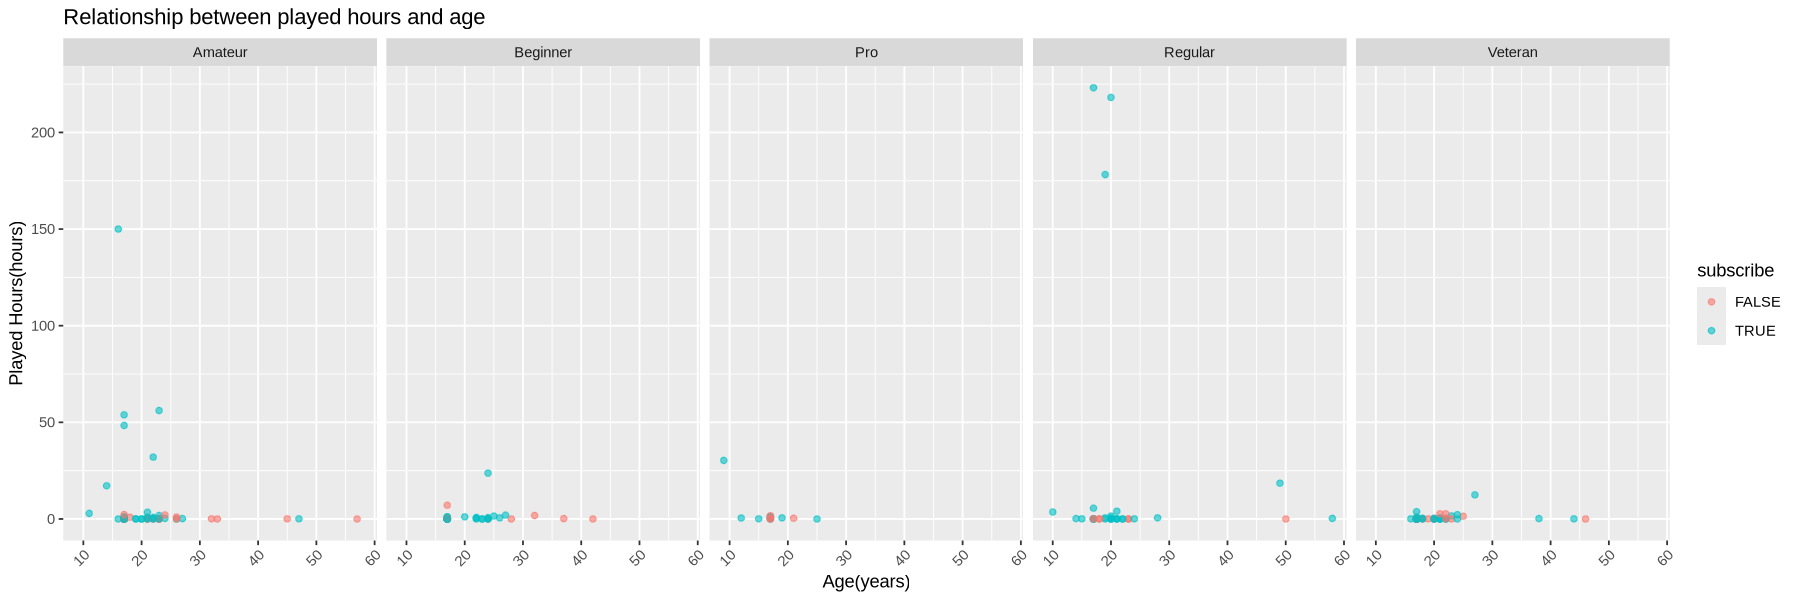

In [22]:
options(repr.plot.width = 15, repr.plot.height = 5)

scatter_plots<- scatter_plot+
facet_grid(~ experience)+
theme(axis.text.x = element_text(angle = 45, hjust = 1))
scatter_plots

played_hours is a relatively strong predictor of newsletter subscription, and the effect of played_hours varies across experience levels. Players who spend more time in the game are much more likely to subscribe, especially within groups such as Regular and Amateur. Age shows no clear relationship with subscription behaviour. Both subscribers and non-subscribers appear across the full age range.

# 4. Methods and Plan

For this project, I will build a predictive model to determine whether a player will subscribe to the research newsletter based on their gender, played_hours and Age.  

Since the outcome variable subscribe is binary (TRUE/FALSE), I decide to use KNN classification as my modeling method. This method is appropriate for binary classification problems and is relatively easy to interpret, as it groups individuals based on similarity and predicts their subscription behaviour accordingly.  

Some assumptions are required. First, the independence of observations must be ensured, meaning each player should represent a unique individual. Besides, the model requires a sufficient sample size within each category so that predictions remain reliable.  

There are some potential limitations. For instance, certain gender categories may contain very few observations, leading to imbalanced groups and less stable predictions.  

I will use gender, played_hours and Age as predictors. Before modeling, I will check for skewed variables and consider transformations if necessary, like log-transforming heavily skewed played_hours values. I will also check for missing values and handle them appropriately, convert Age to a numeric variable, and standardize the continuous predictors (Age and played_hours).  

The data will be split into an 80% training set and a 20% testing set to evaluate the model's performance. The split will occur before any model fitting. Within the training set, I will use 5-fold cross-validation to tune the model. Model accuracy and the confusion matrix will be used as evaluation metrics.